In [2]:
# import sys
# sys.path.append('thirdparty/insightface/python-package')

In [50]:
from insightface.app import FaceAnalysis
import insightface
import cv2


In [81]:
from numpy.linalg import norm as l2norm


def normed_embedding(embedding):
    return embedding / l2norm(embedding)


In [48]:
reg_model = insightface.model_zoo.get_model(
    "ckpts/models/buffalo_l/w600k_r50.onnx", providers=["CUDAExecutionProvider"]
)
reg_model.prepare(ctx_id=1)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}


In [61]:
from glob import glob

all_folders = glob("/mnt/DATA2/congvm/Affwild2/cropped_aligned/*")
all_folders = [f.split("/")[-1] for f in all_folders]
all_folders[-1]


'421'

In [82]:
feats = []
for f in all_folders[:200]:
    path = glob(f"/mnt/DATA2/congvm/Affwild2/cropped_aligned/{f}/*")[0]
    img_arr = cv2.imread(path)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    features = normed_embedding(reg_model.get_feat(img_arr).flatten())
    feats.append(features)


In [11]:
from insightface.data import get_image as ins_get_image
import matplotlib.pyplot as plt

app = FaceAnalysis(
    root="ckpts",
    allowed_modules=["recognition"],
    providers=["CUDAExecutionProvider"],
)
app.prepare(ctx_id=0, det_size=(640, 640))

img = ins_get_image("t1")
faces = app.get(img)
rimg = app.draw_on(img, faces)
plt.imshow(rimg[..., ::-1])

normed_feats = []
feats = []

for face in faces:
    normed_feats.append(face.normed_embedding)
    feats.append(face.embedding)

print(feats[0].shape)
print(normed_feats[0].shape)


In [83]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# normed_x = np.stack(normed_feats)
feats_x = np.stack(feats)

# print(normed_x.shape)
print(feats_x.shape)


(200, 512)


In [85]:
feats_x.shape

(200, 512)

In [86]:
# normed_X_embedded = TSNE(n_components=2, init="random").fit_transform(normed_x)
feats_X_embedded = TSNE(n_components=2, init="random").fit_transform(feats_x)


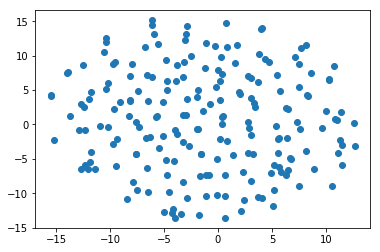

In [87]:
plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1])

In [73]:
# plt.scatter(feats_X_embedded[:, 0], feats_X_embedded[:, 1])